
# Multiple Linear Regression

by Emil Vassev

September 17, 2022; September 22, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

# Getting Familiar with Multiple Linear Regression 
Multiple linear regression refers to a statistical technique that is used to predict the outcome of a variable based on the value of two or more variables. It is sometimes known simply as multiple regression, and it is an extension of linear regression. The variable that we want to predict is known as the dependent variable, while the variables we use to predict the value of the dependent variable are known as independent or explanatory variables.

## Real-Life Scenario

The example data we’re going to analyze is a real-life data about the profit of 50 startups running in the US. What we need to analyze is various expenses such as R&D Spend, Administration expenses, Marketing Spend and the State location of the startup (e.g., California). The Profit is the target.
<br><br>
Data taken from: https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv
<br><br>
*Objective*: Train and test a Multiple Linear Regression model to predict the Profit of a startup if it runs in a particular State and has calculated expenses such as R&D Spend, Administration expenses, and Marketing Spend.

### Step 1. Load & Analyze Data

In [1]:
import pandas as pd
df = pd.read_csv('data\\50_startups.csv')

In [2]:
df.head(10)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.shape

(50, 5)

In [4]:
#Statistical Details of the dataset
df.describe()

,R_D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.columns

Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

### Step 2. Pre-process Data

State is not a numerical feature – we need to transform it to a numerical.

In [6]:
date_unique = df['State'].unique()
class_mapper = {}
num = 0
for element in date_unique:
    num += 1
    class_mapper[element] = num
    
df['State'] = df['State'].replace(class_mapper)  

In [7]:
df.head(10)

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94
5,131876.90,99814.71,362861.36,1,156991.12
6,134615.46,147198.87,127716.82,2,156122.51
7,130298.13,145530.06,323876.68,3,155752.60
8,120542.52,148718.95,311613.29,1,152211.77
9,123334.88,108679.17,304981.62,2,149759.96


### Step 3. Train Model

We use the **train_test_split** function to split the dataset into a training and testing sets.<br><br>
The independent variables X are all the data features, but the Profit feature. The latter is the dependent variable y.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Y = df.iloc[:, df.columns.get_loc('Profit')]
X = df.loc[:, df.columns != 'Profit']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [11]:
print(X_train)

    R_D_Spend  Administration  Marketing_Spend  State
33   55493.95       103057.49        214634.81      3
35   46014.02        85047.44        205517.64      1
26   75328.87       144135.98        134050.07      3
34   46426.07       157693.92        210797.67      2
18   91749.16       114175.79        294919.57      3
7   130298.13       145530.06        323876.68      3
14  119943.24       156547.42        256512.92      3
45    1000.23       124153.04          1903.93      1
48     542.05        51743.15             0.00      1
29   65605.48       153032.06        107138.38      1
15  114523.61       122616.84        261776.23      1
30   61994.48       115641.28         91131.24      3
32   63408.86       129219.61         46085.25      2
16   78013.11       121597.55        264346.06      2
42   23640.93        96189.63        148001.11      2
20   76253.86       113867.30        298664.47      2
43   15505.73       127382.30         35534.17      1
8   120542.52       148718.9

In [12]:
print(Y_train)

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64


We use the **fit()** method of the **LinearRegression** class to train.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### Step 4. Make Predictions

In [15]:
Y_pred = lr.predict(X_test)

In [16]:
print(Y_pred)

[103083.22418255 132499.19098469 132504.92013514  72044.22079157
 178578.88804813 116196.18897916  67901.09868183  98843.64614762
 114025.15059486 167965.96780569]


### Step 5. Evaluate Model
We can use the standard `metrics.r2_score()` method to compare *Y_test* and *Y_pred*.

In [17]:
from sklearn import metrics
r2_score = metrics.r2_score(Y_test,Y_pred)
print(r2_score)

0.9348088470484868


In [18]:
print(Y_test)

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64


In [19]:
print(Y_pred)

[103083.22418255 132499.19098469 132504.92013514  72044.22079157
 178578.88804813 116196.18897916  67901.09868183  98843.64614762
 114025.15059486 167965.96780569]


### Step 6. Plot Multiple Linear Regression

Use the actual and predicted profits to plot the results.

Text(0, 0.5, 'Predicted')

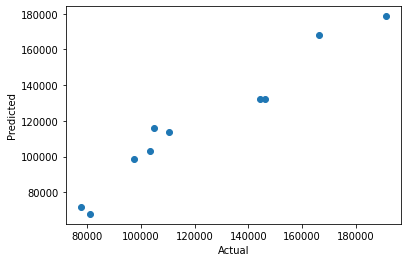

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Profit'>

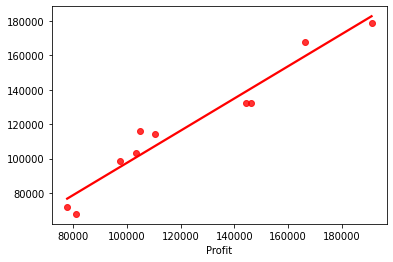

In [22]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red')

## Feature Importance
Feature importance is a score assigned to an input feature by the ML algorithm. The score is calculated based on how useful that feature is at predicting the target variable.
<br><br>
Feature importance can be used to improve a predictive model by: 
* removing features with low score;
* keeping features with a high score. 

In [23]:
def showFeatureImportance(lr):
    importance = lr.coef_ #the coef_ method returns the feature importance 

    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: ' + X.columns[i] + ': %.5f' % (v))

    #plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

Feature: R_D_Spend: 0.77337
Feature: Administration: 0.03289
Feature: Marketing_Spend: 0.03655
Feature: State: -820.29304


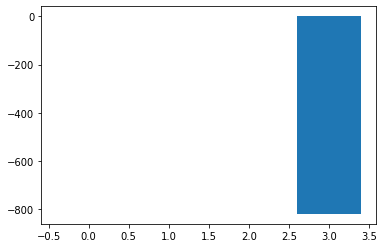

In [24]:
showFeatureImportance(lr)

*State* is with a negative feature importance. A negative feature importance value means that a feature increases the total loss and therefore, that feature is eventually not good for our model.


In [25]:
df_no_state = df.copy()
df_no_state.drop('State', axis=1, inplace=True)

In [26]:
Y = df_no_state.iloc[:, df_no_state.columns.get_loc('Profit')]
X = df_no_state.loc[:, df_no_state.columns != 'Profit']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [28]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [29]:
Y_pred = lr.predict(X_test)

In [30]:
print(Y_test)

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64


In [31]:
print(Y_pred)

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [32]:
r2_score_new = metrics.r2_score(Y_test,Y_pred)
print("The r2_score with the State feature: " + str(r2_score))
print("The r2_score without the State feature: " + str(r2_score_new))

The r2_score with the State feature: 0.9348088470484868
The r2_score without the State feature: 0.9393955917820569


Feature: R_D_Spend: 0.77884
Feature: Administration: 0.02939
Feature: Marketing_Spend: 0.03471


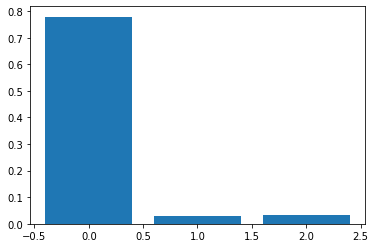

In [33]:
showFeatureImportance(lr)

## Multicollinearity
Assumption: The independent variables are not highly correlated with each other.

### Get the Realtionships between the Input Variables
By using the correlation method **df.corr()**, we can generate the relationship between the continuous variables in our dataframe.

In [34]:
df.corr()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


In [35]:
X.corr()

,R_D_Spend,Administration,Marketing_Spend
R_D_Spend,1.000000,0.241955,0.724248
Administration,0.241955,1.000000,-0.032154
Marketing_Spend,0.724248,-0.032154,1.000000


### Use Regularization to Check for Multicollinearity
In order to create less complex model and to avoid multicollinearity we may use some of the Regularization techniques: 
* L1 regularization - a regression model that uses this technique is called Lasso Regression;
* L2 regularization - a regression model that uses this technique is called Ridge Regression.

If we have a multicollinearity problem, we may use a Ridge regression, e.g., BayesianRidge ML algorithm. This method performs data regularization (L2 regularization = ridge regression). When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [36]:
from sklearn.linear_model import BayesianRidge

In [37]:
br = BayesianRidge()
br.fit(X_train, Y_train)

BayesianRidge()

In [38]:
Y_pred = br.predict(X_test)

In [39]:
r2_score_br = metrics.r2_score(Y_test,Y_pred)
print("The LinearRegression r2_score with the State feature: " + str(r2_score))
print("The LinearRegression r2_score without the State feature: " + str(r2_score_new))
print("The BayesianRidge r2_score without the State feature: " + str(r2_score_br))

The LinearRegression r2_score with the State feature: 0.9348088470484868
The LinearRegression r2_score without the State feature: 0.9393955917820569
The BayesianRidge r2_score without the State feature: 0.9375447257635989


We see that **the score of BayesianRidge** < **the score of LinearRegression**. Hence, we can conclude that we don't have multicollinearity.

Feature: R_D_Spend: 0.76912
Feature: Administration: 0.03378
Feature: Marketing_Spend: 0.03724


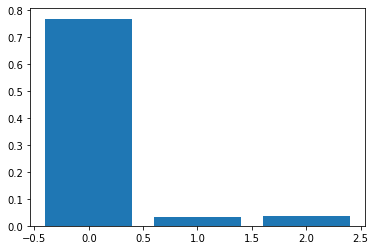

In [40]:
showFeatureImportance(br)